In [45]:
!pip install imbalanced-learn

/tmp/ipython-input-3256824461.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("/content/drive/MyDrive/Yeast/yeast.data", header=None, delim_whitespace=True,names=features_name)


Gia trị các đặc trưng: 
       mcg   gvh   alm   mit  erl  pox   vac   nuc
0     0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22
1     0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22
2     0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22
3     0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22
4     0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22
...    ...   ...   ...   ...  ...  ...   ...   ...
1479  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22
1480  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47
1481  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22
1482  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39
1483  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22

[1484 rows x 8 columns]
Nhan: 
0       MIT
1       MIT
2       MIT
3       NUC
4       MIT
       ... 
1479    ME2
1480    NUC
1481    ME2
1482    NUC
1483    CYT
Name: label, Length: 1484, dtype: object
Dữ liệu trước khi SMOTE:
label
CYT    367
NUC    344
MIT    192
ME3    129
ME2     45
ME1     36
EXC     27
VAC     24
POX     18
ERL      5
Name: count, dtype

TypeError: '<' not supported between instances of 'int' and 'str'

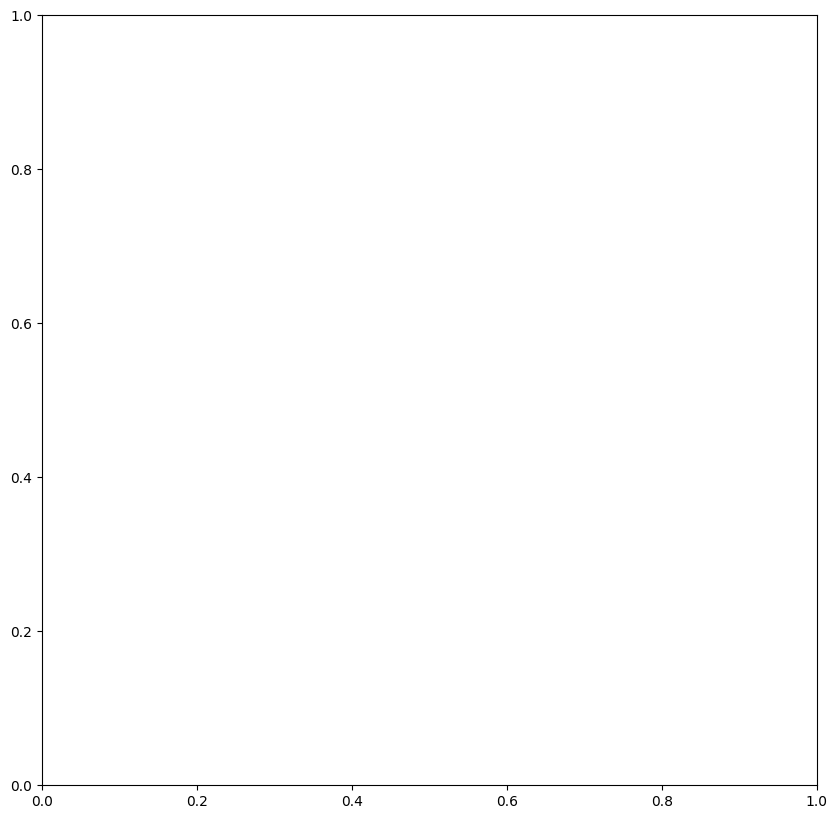

In [168]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
features_name = ['name','mcg','gvh','alm','mit','erl','pox','vac','nuc','label']
data = pd.read_csv("/content/drive/MyDrive/Yeast/yeast.data", header=None, delim_whitespace=True,names=features_name)

# print(data.head(5))
# X = data.iloc[:,1:-1]
X = data.drop(columns=['name','label'])
y = data.iloc[:,-1]
print("Gia trị các đặc trưng: ")
print(X)
print("Nhan: ")
print(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print("Dữ liệu trước khi SMOTE:")
print(y_train.value_counts())
strategy = {
    'ME2': 50,
    'ME1': 50,
    'ERL': 50,
    'POX': 50,
    'VAC': 50,
    'EXC': 50
}
smote = SMOTE(random_state =42,
              sampling_strategy=strategy,
              k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Dữ liệu sau khi SMOTE:")
print(y_train_smote.value_counts())
# print("Đang mã hóa nhãn (LabelEncoder)...")
# le = LabelEncoder()
# y_train_encoded = le.fit_transform(y_train)
# y_test_encoded = le.transform(y_test)
model = DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth= 10,
    min_impurity_decrease= 0.01,
    min_samples_leaf= 5,
    min_samples_split= 40,
    splitter= 'best')
# Với mô hình này không SMOTE độ chính xác = 0.599, với smote(50 mẫu) độ chính xác = 0.577
model_1 = RandomForestClassifier(
    n_estimators = 500,
    min_samples_split = 5,
    min_samples_leaf= 1,
    max_depth= 50,
    criterion= 'gini',
    bootstrap= True,
    random_state=42,
    n_jobs=-1)
# Với mô hình này không SMOTE độ chính xác = 0.619, với smote(50 mẫu) độ chính xác = 0.612
model_2 = GaussianNB()
model_3 = KNeighborsClassifier(n_neighbors=15, n_jobs=-1)
model_4 = XGBClassifier(
    random_state=42,
    n_jobs=-1,
    # Dùng 'objective='multi:softmax'' vì bạn có 10 lớp
    objective='multi:softmax',
    num_class=10
)
model = model_1
model.fit(X_train,y_train_encoded)
y_pred = model.predict(X_test)
# print(y_pred)

accuracy = accuracy_score(y_test_encoded,y_pred)
print(f"Accuracy: {accuracy}")
print('Classification Report:')
print(classification_report(y_test_encoded,y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test_encoded,y_pred))
print("\nĐang vẽ biểu đồ Confusion Matrix...")

# Tự động lấy tên các lớp từ mô hình đã huấn luyện (sẽ có 10 lớp)
class_names = model.classes_

fig, ax = plt.subplots(figsize=(10, 10))


disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    labels=class_names, # <-- THÊM DÒNG NÀY
    display_labels=class_names,
    cmap=plt.cm.Blues,
    values_format='g',
    xticks_rotation='vertical',
    ax=ax
)

plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
print("Đang vẽ biểu đồ Feature Importance...")

# Lấy tên các đặc trưng (ví dụ: 'mcg', 'gvh',...)
feature_names = X.columns
# Lấy độ quan trọng từ mô hình
importances = model.feature_importances_

# Sắp xếp chúng
indices = np.argsort(importances)[::-1]
sorted_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), sorted_importances, align='center')
plt.xticks(range(X.shape[1]), sorted_names, rotation=45)
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()
y_score = model.predict_proba(X_test)
class_names = model.classes_

# Binarize (nhị phân hóa) nhãn y_test
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = len(class_names)

# Tính toán P-R cho từng lớp
precision = dict()
recall = dict()
avg_precision = dict()

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

    # Vẽ đường cong P-R cho lớp này
    plt.plot(recall[i], precision[i], lw=2,
             label=f'Lớp {class_names[i]} (AP={avg_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (One-vs-Rest)')
plt.legend(loc='best')
plt.show()
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Vẽ đường cong ROC cho lớp này
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'Lớp {class_names[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Đường chéo 45 độ (ngẫu nhiên)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()
# print(y_pred)
# plt.figure(figsize=(30,20))
# plot_tree(model,filled=True )
# plt.show()
